In [35]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

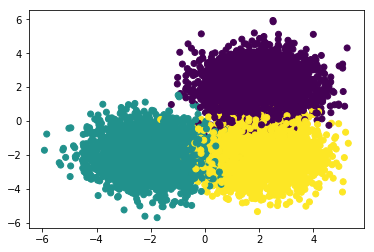

In [36]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [37]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


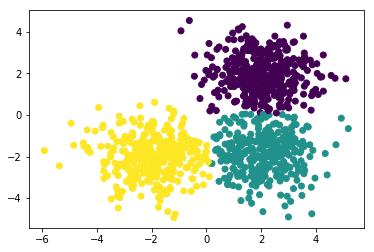

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [38]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

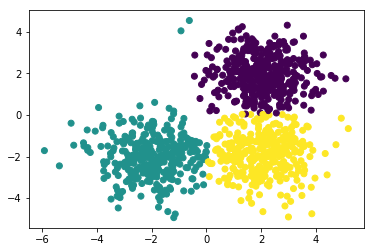

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350    2   10
1        1  310    9
2        7    6  305


In [39]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [40]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


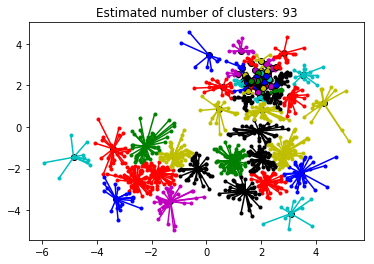

In [41]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Just to run through what I'm going to do real fast, I'm going to create 3 new whole sets of data. Then I'm going to follow the same steps for each set of data that was just laid out in the example and see what happens with the differences in place. 

I made 3 new sets of centers, first with 2, then 4, then 7. 

And yes, I'm just basically going to add numbers to the variables as I go through each iteration of this for simplicities sake. 

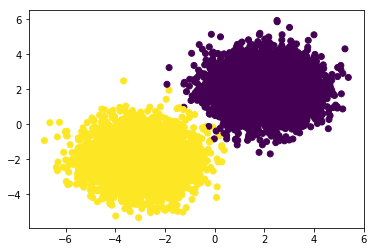

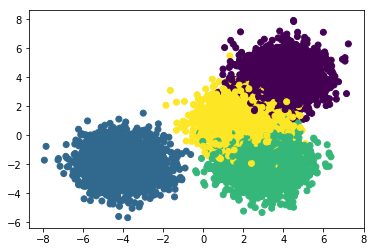

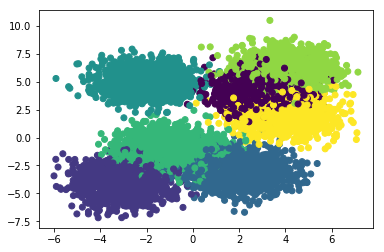

In [42]:
# new blobs here

centers2 = [[2, 2], [-3, -2]]
centers3 = [[4, 4], [-4, -2], [3, -2], [2, 1]]
centers4 = [[3, 4], [-3, -4], [2, -3],[-2, 5], [-1, -1], [4, 6], [4, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=1,
    n_features=2,
    random_state=42)
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=1,
    n_features=2,
    random_state=42)
X4, y4 = make_blobs(
    n_samples=10000,
    centers=centers4,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.show()
plt.scatter(X4[:, 0], X4[:, 1], c=y4)
plt.show()

#Divide into training and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4,
    y4,
    test_size=0.9,
    random_state=42)

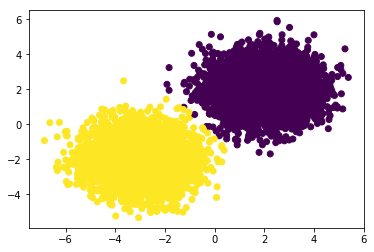

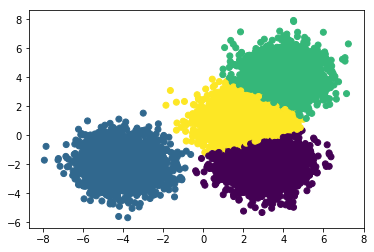

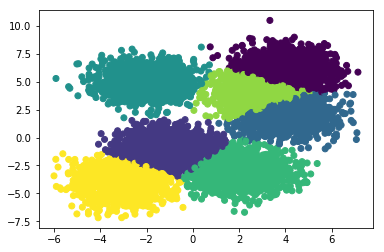

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      4999     5
1         1  4995
Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0         0     0  2355   134
1         0  2500     0     0
2      2406     0     0    85
3        94     0   145  2281
Comparing k-means clusters against the data:
col_0     0     1     2     3     4     5     6
row_0                                          
0       214     0     0     0     0  1257    10
1         0    58    70     0  1328     0     1
2       169     0     4     0     4     9  1212
3         7     0     0  1420     2     2     0
4         0     3  1354     0    55     0     3
5      1039     0     0     9     3   160   202
6         0  1368     1     0    36     0     0


In [43]:
# K-means here 
from sklearn.cluster import KMeans

y_pred2 = KMeans(n_clusters=2, random_state=42).fit_predict(X2)
y_pred3 = KMeans(n_clusters=4, random_state=42).fit_predict(X3)
y_pred4 = KMeans(n_clusters=7, random_state=42).fit_predict(X4)

# Plot the solution.
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred2)
plt.show()
plt.scatter(X3[:, 0], X3[:, 1], c=y_pred3)
plt.show()
plt.scatter(X4[:, 0], X4[:, 1], c=y_pred4)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y2))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y3))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred4, y4))

In [44]:
# Mean Shift

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth2 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)
bandwidth3 = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)
bandwidth4 = estimate_bandwidth(X_train4, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms2.fit(X_train2)
ms3 = MeanShift(bandwidth=bandwidth3, bin_seeding=True)
ms3.fit(X_train3)
ms4 = MeanShift(bandwidth=bandwidth4, bin_seeding=True)
ms4.fit(X_train4)

# Extract cluster assignments for each data point.
labels2 = ms2.labels_
labels3 = ms3.labels_
labels4 = ms4.labels_

# Coordinates of the cluster centers.
cluster_centers2 = ms2.cluster_centers_
cluster_centers3 = ms3.cluster_centers_
cluster_centers4 = ms4.cluster_centers_

# Count our clusters.
n_clusters_2 = len(np.unique(labels2))
n_clusters_3 = len(np.unique(labels3))
n_clusters_4 = len(np.unique(labels4))

print("Number of estimated clusters: {}".format(n_clusters_2))
print("Number of estimated clusters: {}".format(n_clusters_3))
print("Number of estimated clusters: {}".format(n_clusters_4))


Number of estimated clusters: 2
Number of estimated clusters: 4
Number of estimated clusters: 3


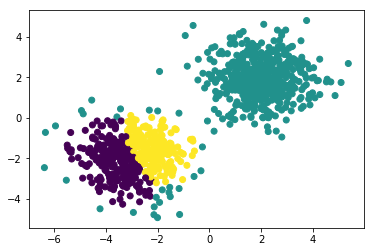

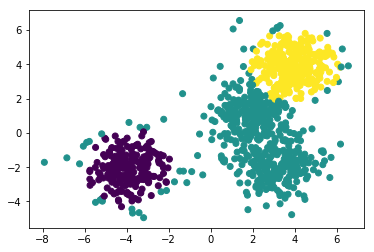

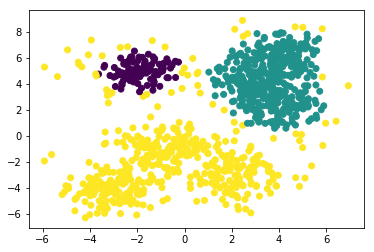

Comparing the assigned categories to the ones in the data(2 clusters):
col_0    0    1    2
row_0               
0        0  512    0
1      250   30  208
Comparing the assigned categories to the ones in the data(4 clusters):
col_0    0    1    2
row_0               
0        0   21  252
1      212   27    0
2        0  238    0
3        0  235   15
Comparing the assigned categories to the ones in the data(7 clusters):
col_0    0    1    2
row_0               
0        0  146    3
1        0    0  155
2        0    0  147
3      104    0   31
4        0    0  141
5        0  142    8
6        0  111   12


In [45]:
# Spectral Clustering
# We know we're looking for three clusters.
n_clusters2=2
n_clusters3=4
n_clusters4=7

# Declare and fit the model.
sc2 = SpectralClustering(n_clusters=n_clusters2)
sc2.fit(X_train2)
sc3 = SpectralClustering(n_clusters=n_clusters3)
sc3.fit(X_train3)
sc4 = SpectralClustering(n_clusters=n_clusters4)
sc4.fit(X_train4)

#Predicted clusters.
predict2=sc.fit_predict(X_train2)
predict3=sc.fit_predict(X_train3)
predict4=sc.fit_predict(X_train4)

#Graph results.
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2)
plt.show()
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3)
plt.show()
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=predict4)
plt.show()

print('Comparing the assigned categories to the ones in the data(2 clusters):')
print(pd.crosstab(y_train2,predict2))
print('Comparing the assigned categories to the ones in the data(4 clusters):')
print(pd.crosstab(y_train3,predict3))
print('Comparing the assigned categories to the ones in the data(7 clusters):')
print(pd.crosstab(y_train4,predict4))

In [51]:
# Affinity Propogation
af2 = AffinityPropagation().fit(X_train2)
af3 = AffinityPropagation().fit(X_train3)
af4 = AffinityPropagation().fit(X_train4)

print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices2 = af2.cluster_centers_indices_
n_clusters_2 = len(cluster_centers_indices2)
labels2 = af2.labels_
print('Estimated number of clusters: {}'.format(n_clusters_2))

cluster_centers_indices3 = af3.cluster_centers_indices_
n_clusters_3 = len(cluster_centers_indices3)
labels3 = af3.labels_
print('Estimated number of clusters: {}'.format(n_clusters_3))

cluster_centers_indices4 = af4.cluster_centers_indices_
n_clusters_4 = len(cluster_centers_indices4)
labels = af4.labels_
print('Estimated number of clusters: {}'.format(n_clusters_4))


Done
Estimated number of clusters: 210
Estimated number of clusters: 23
Estimated number of clusters: 24


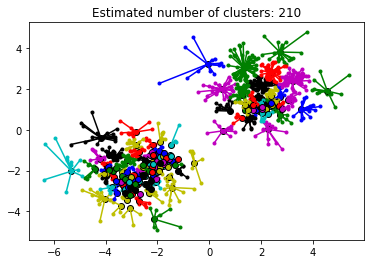

In [52]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_2), colors):
    class_members2 = labels2 == k
    cluster_center2 = X_train2[cluster_centers_indices2[k]]
    plt.plot(X_train2[class_members2, 0], X_train2[class_members2, 1], col + '.')
    plt.plot(cluster_center2[0],
             cluster_center2[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members2]:
        plt.plot([cluster_center2[0], x[0]], [cluster_center2[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_2))
plt.show()



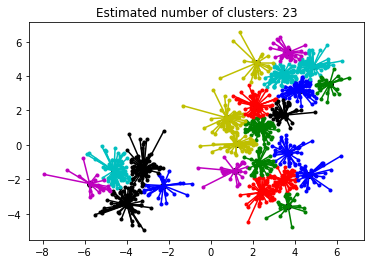

In [53]:
plt.figure(1)
plt.clf()

for k, col in zip(range(n_clusters_3), colors):
    class_members3 = labels3 == k
    cluster_center3 = X_train3[cluster_centers_indices3[k]]
    plt.plot(X_train3[class_members3, 0], X_train3[class_members3, 1], col + '.')
    plt.plot(cluster_center3[0],
             cluster_center3[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members3]:
        plt.plot([cluster_center3[0], x[0]], [cluster_center3[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_3))
plt.show()



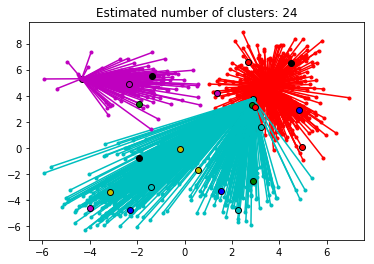

In [54]:
plt.figure(1)
plt.clf()

for k, col in zip(range(n_clusters_4), colors):
    class_members4 = labels4 == k
    cluster_center4 = X_train4[cluster_centers_indices4[k]]
    plt.plot(X_train4[class_members4, 0], X_train4[class_members4, 1], col + '.')
    plt.plot(cluster_center4[0],
             cluster_center4[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train4[class_members4]:
        plt.plot([cluster_center4[0], x[0]], [cluster_center4[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_4))
plt.show()

It's really interesting to see that the set with the largest number of true clusters, isn't grouped the same way the others are. there are three large groups with what looks like smaller groups springkled throughout, but I don't know why the would be moved, what looks like past, 